In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pystan
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [29]:
df=pd.read_excel("./data/real_estate2.xlsx")

In [30]:
df.head()

,id,station,distance,space,room,year,type,value
0,1,Y,徒歩10分以内,70,3LDK,1983,-,910
1,2,Y,徒歩10分以内,70,2LDK,1983,D,1120
2,3,Y,徒歩10分以内,70,2LDK,1983,A,1190
3,4,Y,徒歩10分以内,70,4LDK,1983,A,1190
4,5,Y,徒歩10分以内,70,4LDK,1983,A,1190


In [31]:
df["elapsed"]=2018-df["year"]

In [32]:
df["distance"].unique()

array(['徒歩10分以内', '徒歩15分以内', '徒歩5分以内', '徒歩15分超', 'バス', '-'], dtype=object)

In [33]:
dis_arr=df["distance"].unique()

In [34]:
dis_arr

array(['徒歩10分以内', '徒歩15分以内', '徒歩5分以内', '徒歩15分超', 'バス', '-'], dtype=object)

In [35]:
dis_dict={dis_arr[0]:10,dis_arr[1]:15,dis_arr[2]:5,dis_arr[3]:20,dis_arr[4]:30,dis_arr[5]:np.nan}

In [36]:
dis_dict

{'徒歩10分以内': 10, '徒歩15分以内': 15, '徒歩5分以内': 5, '徒歩15分超': 20, 'バス': 30, '-': nan}

In [37]:
df["distance2"]=df["distance"].apply(lambda x:dis_dict[x])

In [38]:
df.head()

,id,station,distance,space,room,year,type,value,elapsed,distance2
0,1,Y,徒歩10分以内,70,3LDK,1983,-,910,35,10.0
1,2,Y,徒歩10分以内,70,2LDK,1983,D,1120,35,10.0
2,3,Y,徒歩10分以内,70,2LDK,1983,A,1190,35,10.0
3,4,Y,徒歩10分以内,70,4LDK,1983,A,1190,35,10.0
4,5,Y,徒歩10分以内,70,4LDK,1983,A,1190,35,10.0


In [39]:
df=df.dropna()

In [40]:
df2=df[["space","elapsed","distance2","value"]]

C:\Users\daima\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\daima\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\daima\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\daima\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\daima\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\daima\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\daima\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: T

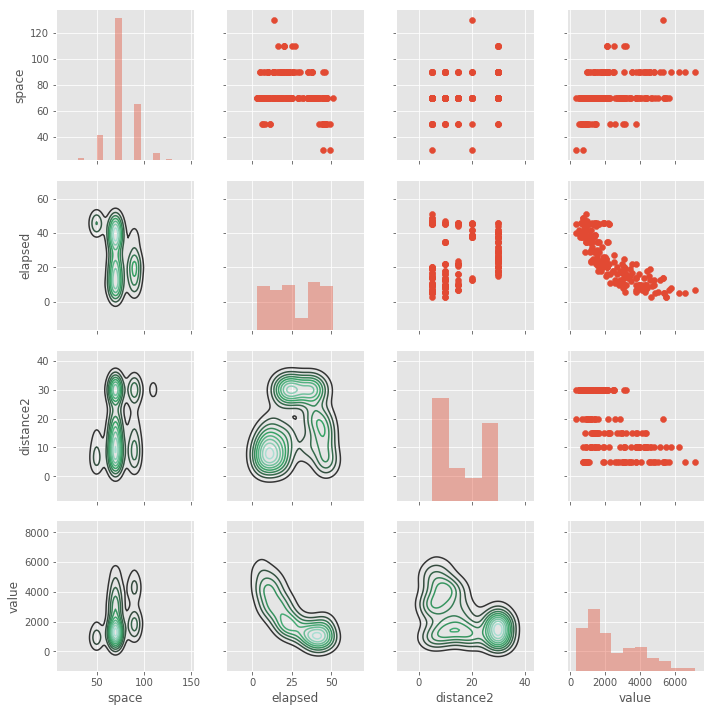

In [41]:
g=sns.PairGrid(df2)
g=g.map_lower(sns.kdeplot)
g=g.map_diag(sns.distplot,kde=False)
g=g.map_upper(plt.scatter)

In [56]:
stan_model="""
data{
  int N;
  real elapsed[N];
  real dis[N];
  real space[N];
  real Y[N];
}

parameters{
  real d;
  real s;
  real e;
  real b;
  real<lower=0> sigma;
}

model{
  for(n in 1:N){
    Y[n]~normal(e*elapsed[n]+d*dis[n]+s*space[n]+b,sigma);
  }
}
"""

In [57]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d01544626bb2a765cf04853e3b5a0bef NOW.


In [58]:
stan_data={"N":df.shape[0],"elapsed":df["elapsed"],"dis":df["distance2"],"space":df["space"],"Y":df["value"]}

In [59]:
fit=sm.sampling(data=stan_data,iter=2000,warmup=500,chains=3,seed=123)

In [60]:
fit

Inference for Stan model: anon_model_d01544626bb2a765cf04853e3b5a0bef.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
d      -57.5    0.09   4.94 -67.36  -60.8 -57.38 -54.19 -47.87   3121    1.0
s      24.59    0.08   3.57  17.51  22.16  24.52  26.96  31.51   2144    1.0
e     -67.71    0.07   3.71 -75.08 -70.22 -67.73 -65.22 -60.57   2664    1.0
b     3301.0    6.39  292.2 2734.0 3102.2 3308.0 3496.8 3876.2   2092    1.0
sigma 636.46    0.53  31.06 578.46 614.97 634.54 656.95 699.88   3460    1.0
lp__   -1363    0.04   1.52  -1366  -1364  -1362  -1362  -1361   1752    1.0

Samples were drawn using NUTS at Mon Apr  8 07:09:40 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

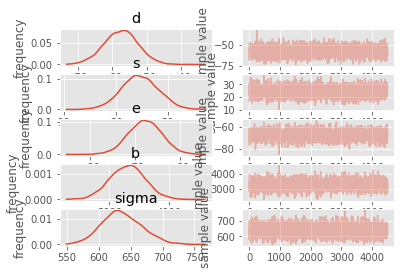

In [61]:
fig=fit.plot()